<center><h1>Moore_Andrew_HW5</h1></center>
<br>
<br>

Name: Andrew Moore
<br>
Github Username: drewm8080
<br>
USC ID: 7583780941

## 1. Decision Trees as Interpretable Models

Import packages

In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import xgboost as xgb



### (a) Obtain Data

Get the Accute Inamations Data Set

In [164]:
df= pd.read_csv('../data/diagnosis.data',sep='\s+',encoding='UTF_16', decimal=',',header =None)
df = df.rename({0:'a1',1:'a2',2:'a3',3:'a4',4:'a5',5:'a6',6:'d1',7:'d2'}, axis='columns')
df.head()

a1  a2   a3   a4   a5   a6   d1  d2
0  35.5  no  yes   no   no   no   no  no
1  35.9  no   no  yes  yes  yes  yes  no
2  35.9  no  yes   no   no   no   no  no
3  36.0  no   no  yes  yes  yes  yes  no
4  36.0  no  yes   no   no   no   no  no

### (b) Build a decision tree

In [165]:
# Reference -- https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe

df = df.replace(to_replace=['no', 'yes'], value=[0, 1])
df.head()

a1  a2  a3  a4  a5  a6  d1  d2
0  35.5   0   1   0   0   0   0   0
1  35.9   0   0   1   1   1   1   0
2  35.9   0   1   0   0   0   0   0
3  36.0   0   0   1   1   1   1   0
4  36.0   0   1   0   0   0   0   0

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

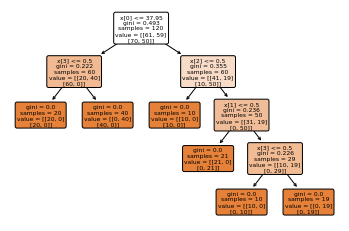

In [166]:
# reference --https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# reference -- https://www.datacamp.com/tutorial/decision-tree-classification-python
# for d1 
x_train = df[["a1","a2","a3","a4","a5","a6"]]
y_train = df[["d1","d2"]]

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
tree.plot_tree(clf,rounded=True, filled= True, fontsize=6)

### (c) Convert the decision rules

In [5]:
# Reference--https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

def tree_to_code(tree, feature_names):


    tree_ = tree.tree_
    feature_name = [
    feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [6]:
tree_to_code(clf,["a1","a2","a3","a4","a5","a6"])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a2 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a2 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Pruning

In [7]:
# Reference: https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn

parameters = {'max_depth':list(range(1,100))}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters,cv=5,n_jobs=-1)
clf.fit(x_train,y_train)

tree_model = clf.best_estimator_
print("Best Score", clf.best_score_, "best Parameters", clf.best_params_) 
print(tree_model)

Best Score 0.95 best Parameters {'max_depth': 4}
DecisionTreeClassifier(max_depth=4)


In [8]:
# reference -- https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4

# getting the tree
model = DecisionTreeClassifier(random_state=2)
model.fit(x_train, y_train)

path = model.cost_complexity_pruning_path(x_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

score= []
for i in alphas:
    tree= DecisionTreeClassifier(ccp_alpha=i)
    # 5 cv 
    scores = cross_val_score(tree, x_train, y_train, cv=5)
    score.append(scores.mean())

alpha_df = pd.DataFrame({'alpha': alphas,'score': score})
alpha_df

alpha     score
0  0.000000  0.950000
1  0.049083  0.741667
2  0.079472  0.708333
3  0.111111  0.566667
4  0.204236  0.200000

In [9]:
# Reference: https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn


# now getting the best depth for the best alpha 
parameters = {'max_depth':list(range(1,100))}
clf = GridSearchCV(DecisionTreeClassifier(ccp_alpha=0.000000), parameters,cv=5,n_jobs=-1)
clf.fit(x_train,y_train)

tree_model = clf.best_estimator_
print("Best Score", clf.best_score_, "best Parameters", clf.best_params_) 
print(tree_model)

Best Score 0.95 best Parameters {'max_depth': 4}
DecisionTreeClassifier(max_depth=4)


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

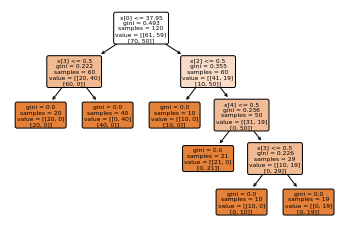

In [12]:
tree.plot_tree(tree_model,rounded=True, filled= True, fontsize=6)

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [167]:
# getting column names 
with open("../data/communities.names") as file_in:
    col_names = []
    for line in file_in:
        if "@attribute" in line:
            name = line.split(" ")
            col_names.append(name[1])
            
# reading in data 
community_df = pd.read_csv('../data/communities.data',header=None,names=col_names)
community_df = community_df.replace('?', np.NaN)
community_df = community_df.iloc[:,5:]

In [168]:
# getting training/test data 

train = community_df.iloc[:1495,:]
test = community_df.iloc[1495:,:]

train = train.reset_index(drop= True)
test = test.reset_index(drop= True)


print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(100), object(23)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(100), object(23)
memory usage: 479.6+ KB
None


### (b) Missing values

In [15]:
train[train.columns[train.isna().any()]].columns

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')

In [16]:
test[test.columns[test.isna().any()]].columns

Index(['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')

In [169]:
# reference -- https://scikit-learn.org/stable/modules/impute.html

impute_columns = ['OtherPerCap','LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop']
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
train[impute_columns]= imp.fit_transform(train[impute_columns])
test[impute_columns]= imp.transform(test[impute_columns])

In [170]:
combined = pd.concat([train,test],axis =0, ignore_index= True)
combined

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163975       0.080502   
1990      0.02     0.37            0.20   0.163975       0.080502   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1989             0.713054             0.451883                 0.00   
1990             0.713054             0.451883                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1989         0.190753                 0.09  
1990         0.190753                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

### (c) Plot a correlation matrix

<AxesSubplot:>

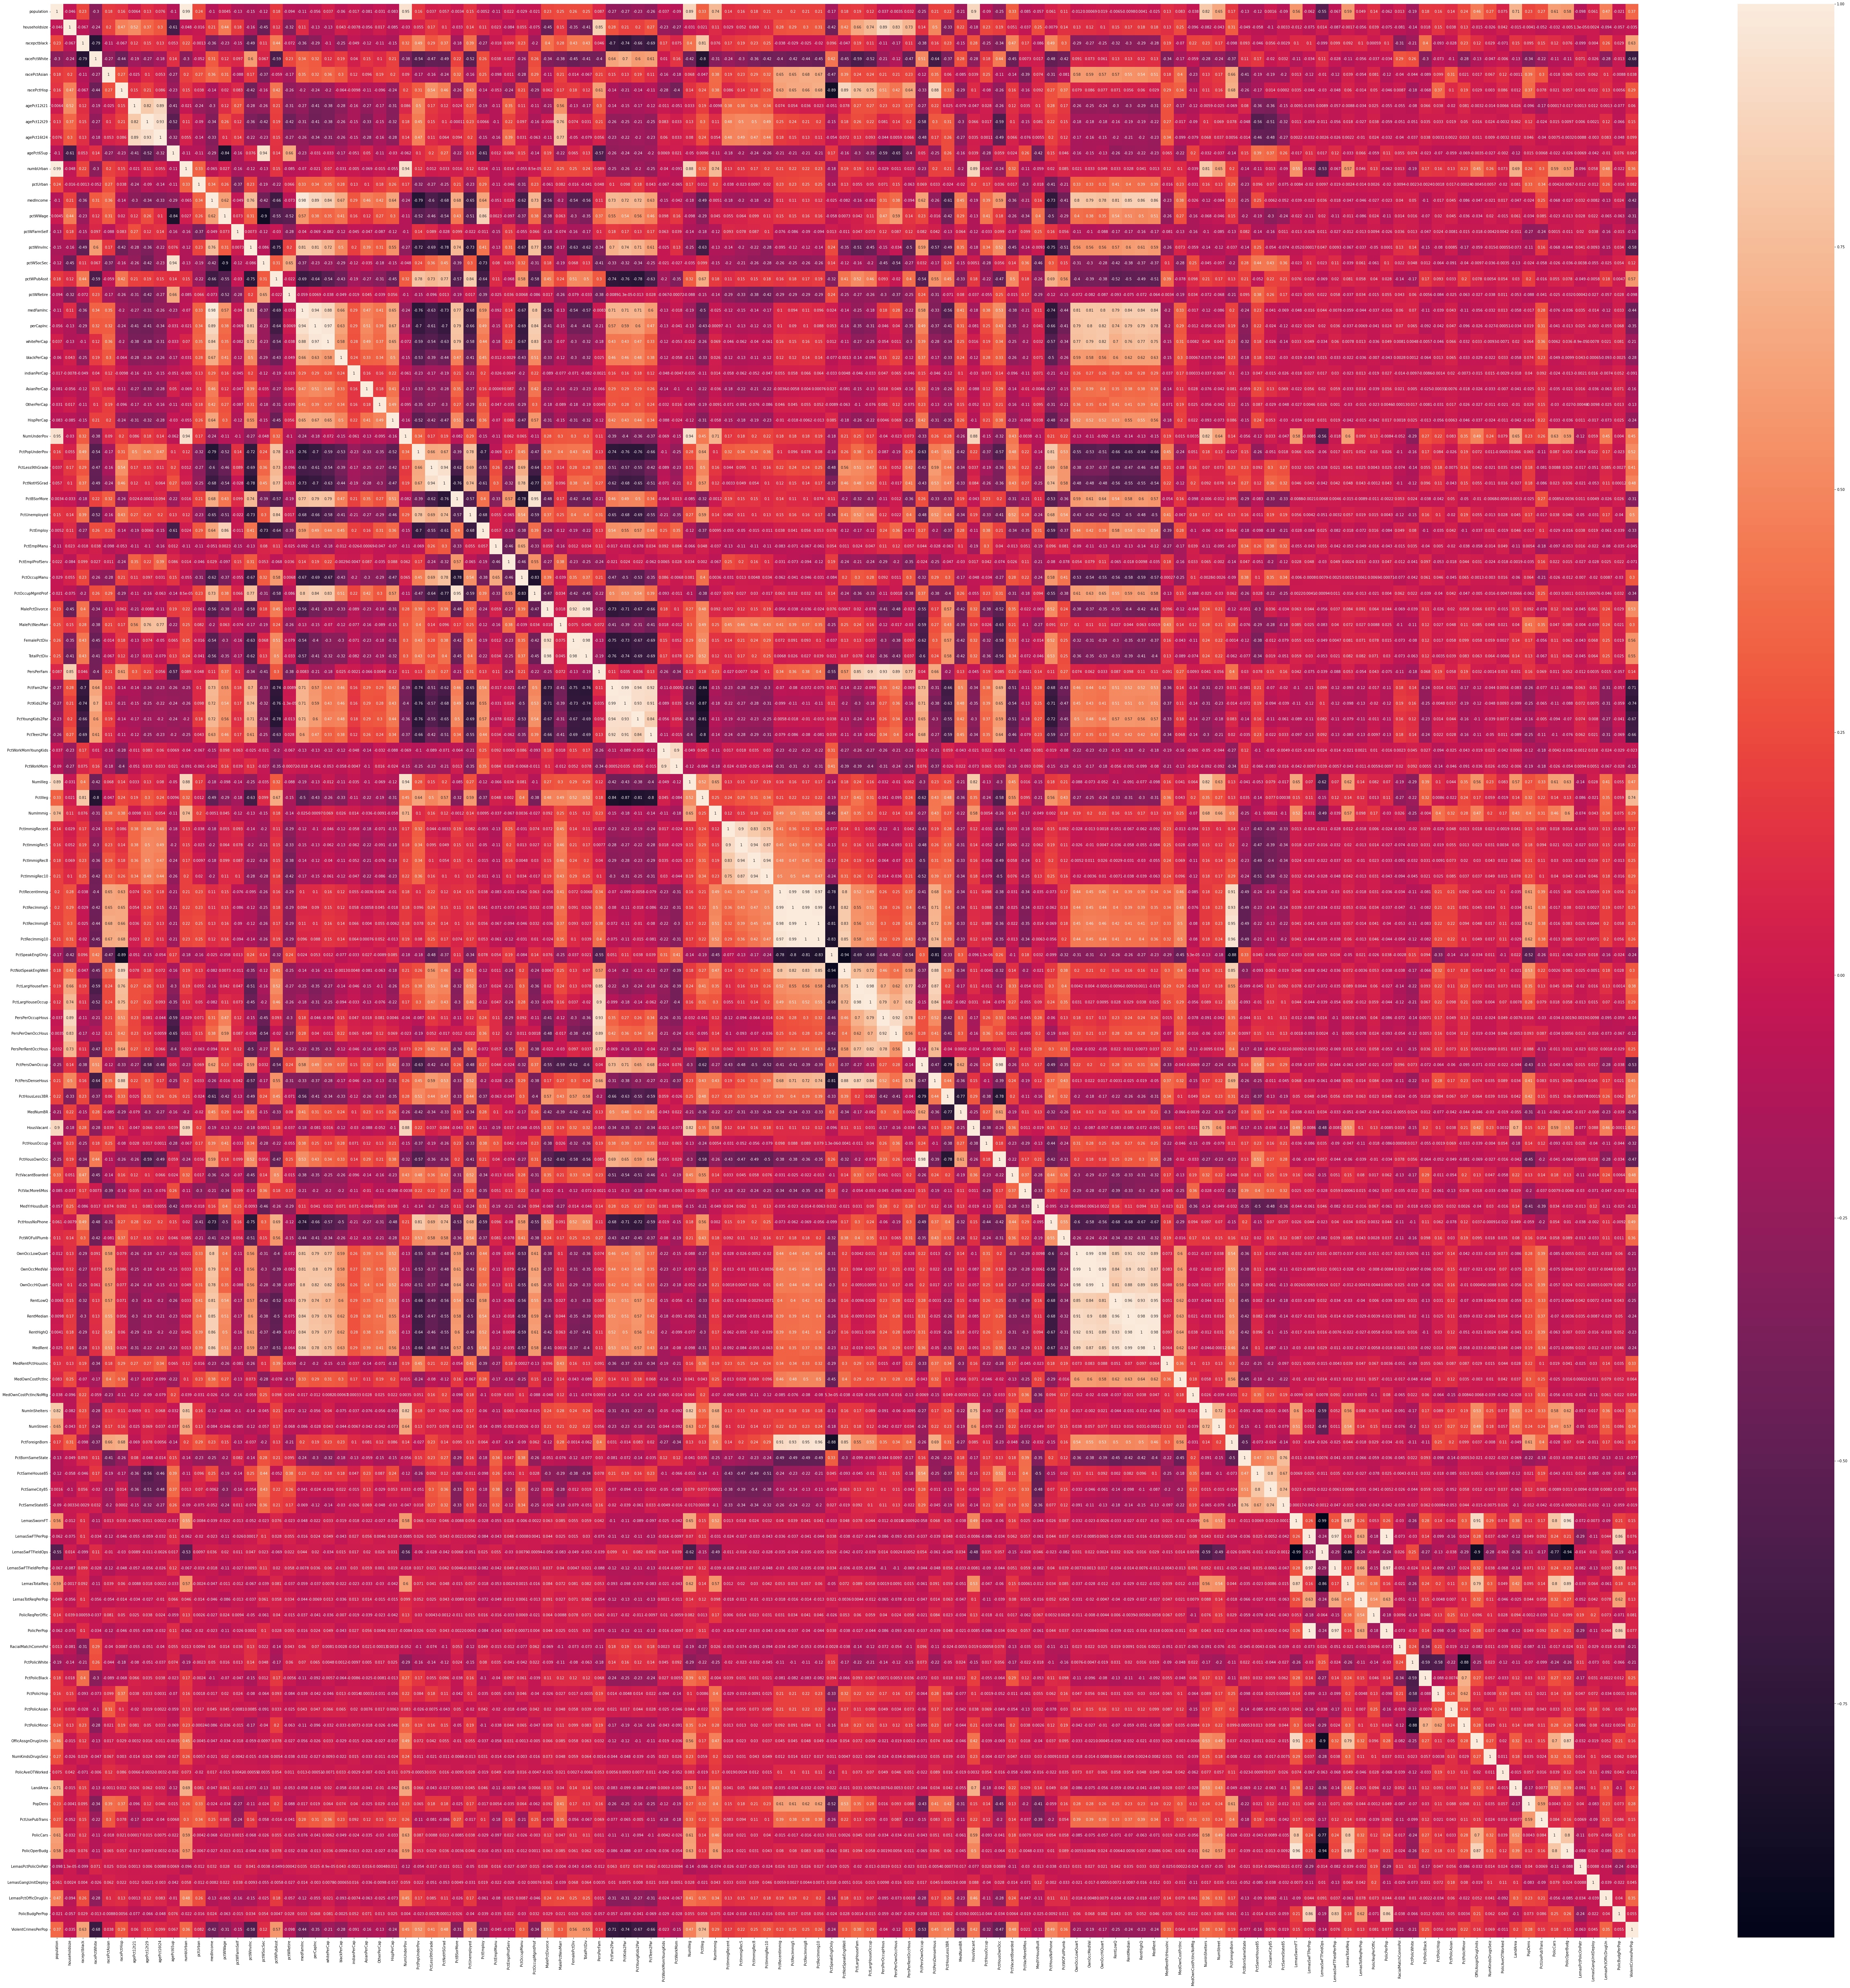

In [19]:
# reference


plt.figure(figsize=(100, 100))
sns.heatmap(combined.corr(),annot=True)

### (d) Calculate the Coefficient of Variation CV

In [20]:
statistics = combined.describe()
statistics.loc['CV'] = statistics.loc['std'] / statistics.loc['mean']
cv= statistics.loc['CV']
print(cv)

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.120471
LemasGangUnitDeploy    0.360299
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.343782
ViolentCrimesPerPop    0.979015
Name: CV, Length: 123, dtype: float64


### (e) Scatter plots and box plots for highest CV features

Most plots are random and are hard to tell however Numshelters, numlleg, numimmig seem to be correlated
with a few of the columns including landarea,population, and numberpov. This might mean they have greater predictive power 





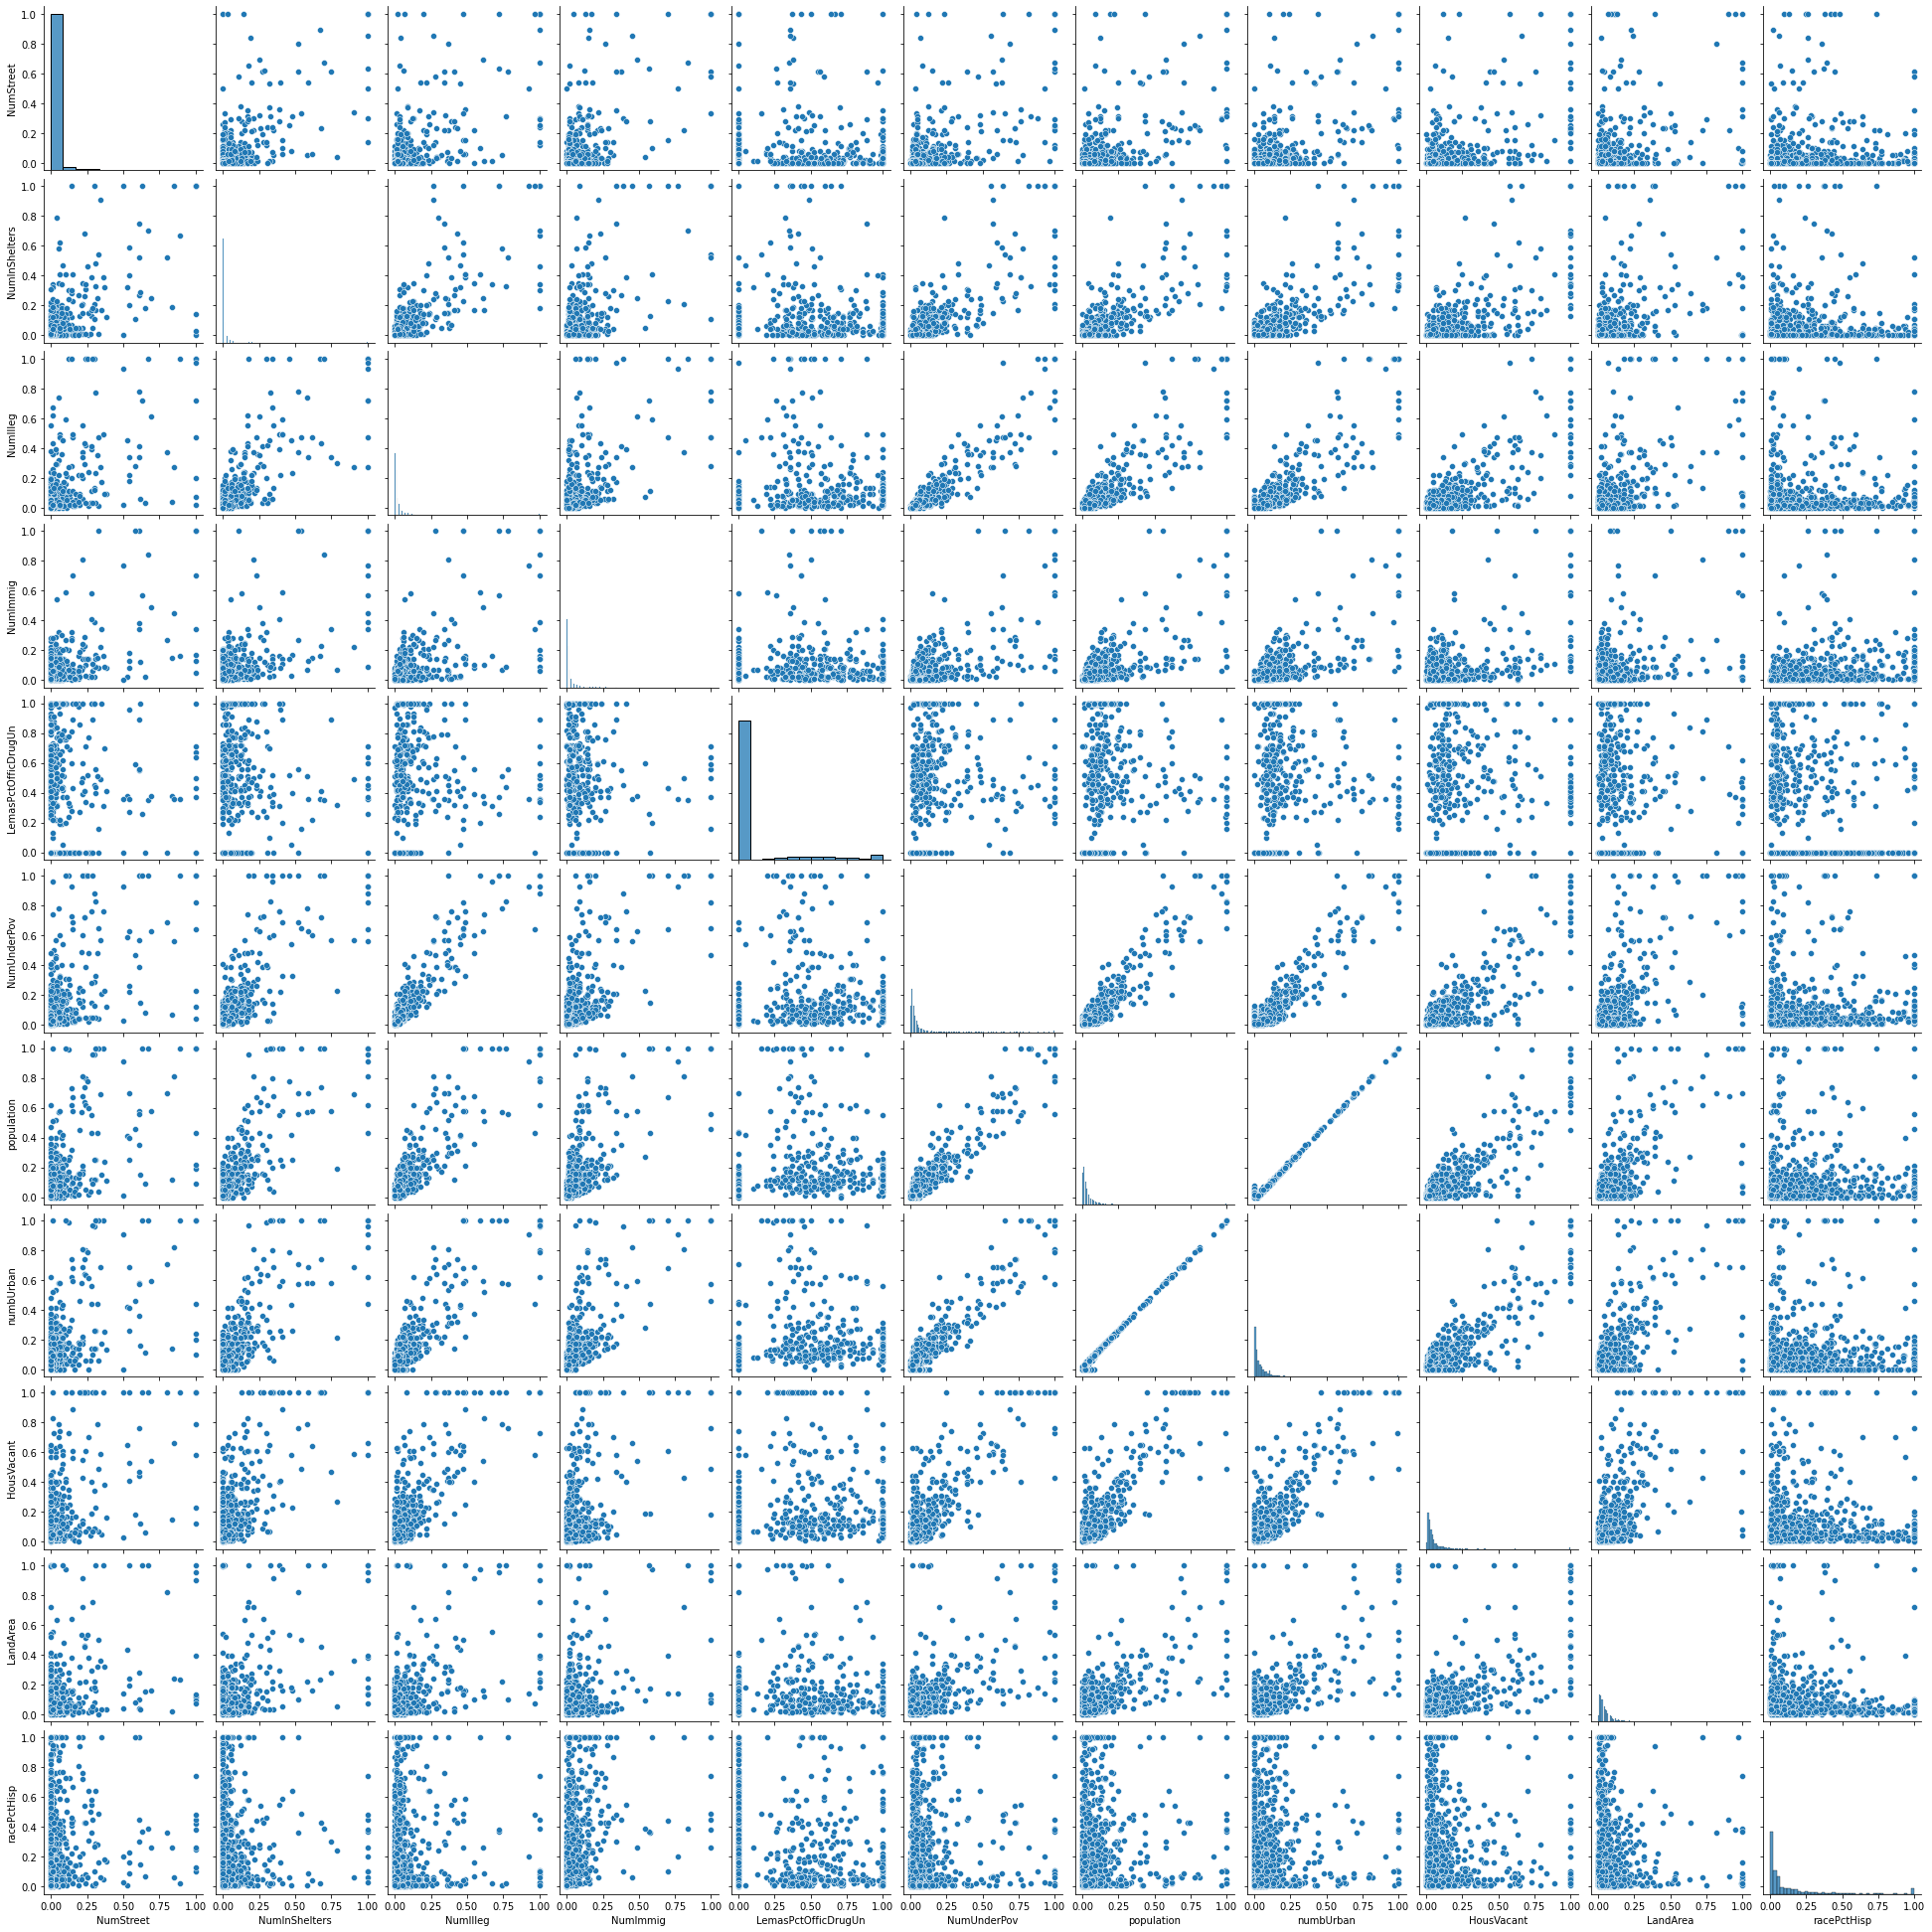

In [21]:
top_cv = cv.sort_values(ascending = False).head(11)
top_cv = top_cv.to_frame().T.columns
sns.pairplot(combined[top_cv])
print('Most plots are random and are hard to tell however Numshelters, numlleg, numimmig seem to be correlated')
print('with a few of the columns including landarea,population, and numberpov. This might mean they have greater predictive power ')
print('')
print('')
print('')

<AxesSubplot:xlabel='column', ylabel='values'>

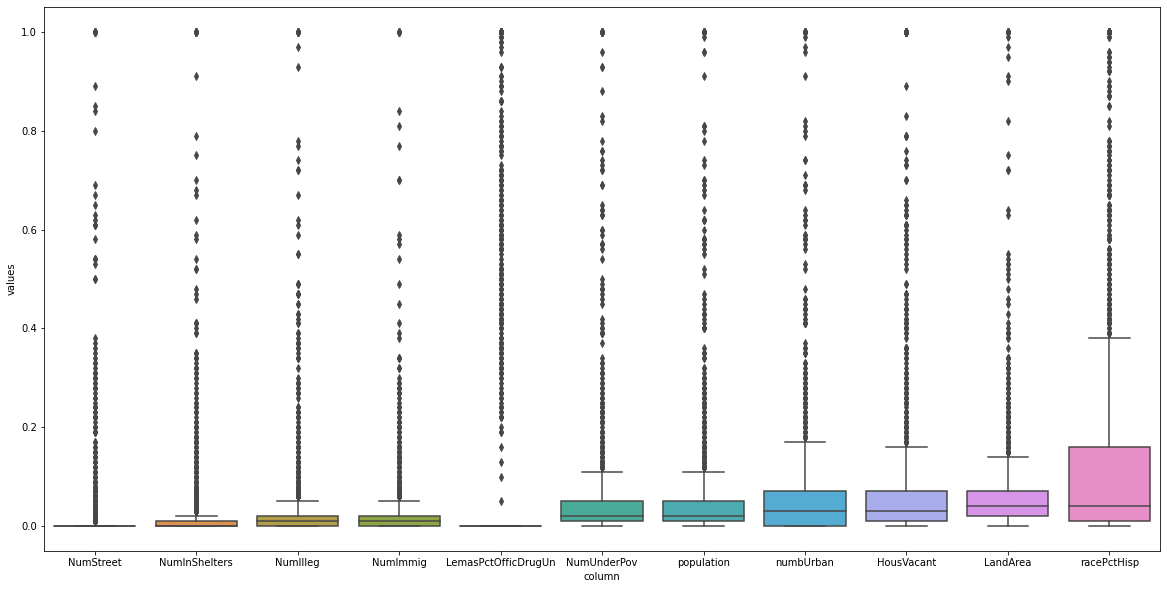

In [22]:
df_melted = pd.melt(combined[top_cv], var_name="column", value_name="values")
plt.figure(figsize=(20,10))
sns.boxplot(x="column", y="values", data=df_melted)

### (f) Fit a linear model

In [23]:
# with statsmodels
x = train.iloc[:,0:-1]
y = train.iloc[:,-1]

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()

print_model = model.summary()
print(print_model)

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Thu, 23 Mar 2023   Prob (F-statistic):          6.56e-291
Time:                         18:00:13   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [24]:
# test,train error

# Test Error
x_test = test.iloc[:,0:-1]
x_test = sm.add_constant(x_test)
test_predictions = model.predict(x_test) 

test_error = mean_squared_error(test[['ViolentCrimesPerPop']],test_predictions)

print('The Test MSE is', test_error)

The Test MSE is 0.018141971135530087


/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### (g) Fit a ridge regression model

In [171]:
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

x = train.iloc[:,0:-1]
y = train.iloc[:,-1]

alpha = tuple(np.arange(0.1, 100.0, 0.1))

model = RidgeCV(alphas=alpha, cv = 5)
model.fit(x,y)

x_test = test.iloc[:,0:-1]
test_predictions = model.predict(x_test) 
test_error = mean_squared_error(test[['ViolentCrimesPerPop']],test_predictions)
print("The chosen alpha was", round(model.alpha_,2),"and the test error was", test_error)



The chosen alpha was 2.3 and the test error was 0.01760026811017567


### (h) Fit a LASSO model

In [172]:
# reference --https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
# not standerdized 
x = train.iloc[:,0:-1]
y = train.iloc[:,-1]

alpha = tuple(np.arange(0.0001, 100.0, 0.1))

model = LassoCV(alphas=alpha, cv = 5,n_alphas=100,selection='random')
model.fit(x,y)
x_test = test.iloc[:,0:-1]
test_predictions = model.predict(x_test) 
test_error = mean_squared_error(test[['ViolentCrimesPerPop']],test_predictions)
print("The chosen alpha was", round(model.alpha_,2),"and the test error was", test_error)


results = list(zip(x.columns,model.coef_))
df = pd.DataFrame(results, columns=['feature', 'Coef'])
df = df[df.Coef>0]
df = df.reset_index(drop=True)
df

The chosen alpha was 0.0 and the test error was 0.017786148424164636


feature      Coef
0           racepctblack  0.273027
1            agePct12t21  0.076084
2             agePct65up  0.004220
3               pctUrban  0.040999
4           pctWFarmSelf  0.029043
5             pctWSocSec  0.059153
6            pctWPubAsst  0.041776
7            AsianPerCap  0.029248
8            OtherPerCap  0.023622
9             HispPerCap  0.025692
10           PctBSorMore  0.017045
11             PctEmploy  0.154781
12          PctOccupManu  0.016507
13        MalePctDivorce  0.132498
14        MalePctNevMarr  0.150742
15              PctIlleg  0.095801
16         PctRecImmig10  0.039549
17      PersPerOccupHous  0.073271
18      PctPersDenseHous  0.231037
19        PctHousLess3BR  0.064908
20              MedNumBR  0.005966
21            HousVacant  0.130281
22      PctVacantBoarded  0.074697
23        PctHousNoPhone  0.026752
24               MedRent  0.173761
25     MedRentPctHousInc  0.090552
26         NumInShelters  0.063261
27             NumStreet  0.169582
28        PctForeignBorn  0.053684
29         PctSameCity85  0.024061
30  LemasSwFTFieldPerPop  0.083638
31      PolicReqPerOffic  0.096679
32          PctPolicHisp  0.002863
33         PctPolicAsian  0.011076
34              LandArea  0.041032
35               PopDens  0.012818
36             PolicCars  0.000558
37   LemasPctPolicOnPatr  0.021739
38   LemasGangUnitDeploy  0.040684
39   LemasPctOfficDrugUn  0.000600

In [173]:
# reference: https://stackoverflow.com/questions/73390492/what-is-the-correct-code-to-use-standardscaler-on-x-train-and-x-test-in-sklear
sc = StandardScaler()

# getting column names

x_train_columns = list(x_train.columns)
x_test_columns = list(x_test.columns)


x_train = train[x_test_columns]
y_train = train.iloc[:,-1]
x_test = test[x_test_columns]

# standerdizing the columns 
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

alpha = tuple(np.arange(0.0001, 100.0, 0.1))

model = LassoCV(alphas=alpha, cv = 5, tol=1e-2)
model.fit(x_train_std,y_train)

test_predictions = model.predict(x_test) 
test_error = mean_squared_error(test.iloc[:,-1],test_predictions)
print("The chosen alpha was", round(model.alpha_,2),"and the test error was", test_error)
print('Standerdizing the data actually worsten the test error, but lead to more features being chosen')


results = list(zip(x_train.columns,model.coef_))
df = pd.DataFrame(results, columns=['feature', 'Coef'])
df = df[df.Coef>0]
df = df.reset_index(drop=True)
df

The chosen alpha was 0.0 and the test error was 0.03524386855519041
Standerdizing the data actually worsten the test error, but lead to more features being chosen


/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


feature      Coef
0           racepctblack  0.070902
1            racePctHisp  0.002883
2            agePct12t21  0.020167
3             agePct65up  0.005601
4               pctUrban  0.020061
5           pctWFarmSelf  0.008673
6             pctWSocSec  0.021419
7            pctWPubAsst  0.011794
8              medFamInc  0.034985
9            AsianPerCap  0.005775
10           OtherPerCap  0.005628
11            HispPerCap  0.005811
12           NumUnderPov  0.001269
13          PctNotHSGrad  0.003007
14           PctBSorMore  0.016908
15         PctUnemployed  0.002546
16             PctEmploy  0.046112
17          PctOccupManu  0.011917
18      PctOccupMgmtProf  0.007761
19        MalePctDivorce  0.041328
20        MalePctNevMarr  0.042300
21   PctWorkMomYoungKids  0.007465
22              PctIlleg  0.016208
23          PctImmigRec5  0.003342
24          PctImmigRec8  0.000502
25         PctRecImmig10  0.012475
26      PersPerOccupHous  0.064220
27      PctPersDenseHous  0.059607
28        PctHousLess3BR  0.019163
29              MedNumBR  0.005792
30            HousVacant  0.026076
31         PctHousOwnOcc  0.054613
32      PctVacantBoarded  0.018005
33        PctHousNoPhone  0.007602
34          OwnOccMedVal  0.019129
35               MedRent  0.064905
36     MedRentPctHousInc  0.014512
37         NumInShelters  0.010291
38             NumStreet  0.018434
39        PctForeignBorn  0.024706
40         PctSameCity85  0.004853
41        PctSameState85  0.002389
42       LemasSwFTPerPop  0.001065
43  LemasSwFTFieldPerPop  0.014645
44      PolicReqPerOffic  0.014100
45         PctPolicAsian  0.002395
46         PctPolicMinor  0.001249
47              LandArea  0.011094
48               PopDens  0.005577
49             PolicCars  0.007915
50         PolicOperBudg  0.024168
51   LemasPctPolicOnPatr  0.001048
52   LemasGangUnitDeploy  0.007288
53   LemasPctOfficDrugUn  0.002558

### (i) Fit a PCR model

In [119]:
# reference -- http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
# reference -- https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
x_train = train[x_test_columns]
y_train = train.iloc[:,-1]

mse = [] 
m_components = []
for i in np.arange(1, 100):
    pcr = make_pipeline(PCA(n_components=i), LinearRegression())
    score = cross_val_score(pcr, x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse.append(-score)
    m_components.append(i)

df = pd.DataFrame(list(zip(m_components,mse)),columns = ['M Components','MSE'])
final_df = df[df.MSE == min(df.MSE)]
print('The lowest MSE was M Components',final_df["M Components"].iloc[0], "with an MSE of", final_df.MSE.iloc[0])
df

The lowest MSE was M Components 96 with an MSE of 0.019408934671243338


M Components       MSE
0              1  0.037901
1              2  0.030629
2              3  0.027567
3              4  0.024294
4              5  0.023093
..           ...       ...
94            95  0.019479
95            96  0.019409
96            97  0.019443
97            98  0.019501
98            99  0.019544

[99 rows x 2 columns]

In [122]:
# now finding the test error
x_train = train[x_test_columns]
y_train = train.iloc[:,-1]
x_test = test[x_test_columns]


pcr = make_pipeline(PCA(n_components=96), LinearRegression())
pcr.fit(x_train,y_train)

test_predictions = model.predict(x_test)

test_error = mean_squared_error(test.iloc[:,-1],test_predictions)
print('The final test error was', test_error)

The final test error was 0.03524386855519041


/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


### (j) Fit a boosting tree

In [162]:
# reference: https://datascience.stackexchange.com/questions/57255/l1-l2-regularization-in-light-gbm
# reference: https://xgboost.readthedocs.io/en/stable/parameter.html

boosted_mse = []
alpha =[]
for i in np.arange(0, 1000, 0.5):
    xgboost_regessor = xgb.XGBRegressor(reg_alpha = i)
    score = cross_val_score(pcr, x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    boosted_mse.append(-score)
    alpha.append(i)
    
df = pd.DataFrame(list(zip(alpha,boosted_mse)),columns = ['Alpha','Boosted_MSE'])
df['Boosted_MSE'] = df['Boosted_MSE'].round(7)
final_df = df.sort_values(by='Boosted_MSE', ascending=False)
print('The lowest MSE was alpha =',final_df["Alpha"].iloc[0], "with an MSE of", final_df['Boosted_MSE'].iloc[0])
df   

The lowest MSE was alpha = 113.0 with an MSE of 0.0194117


Alpha  Boosted_MSE
0       0.0     0.019409
1       0.5     0.019409
2       1.0     0.019408
3       1.5     0.019409
4       2.0     0.019407
...     ...          ...
1995  997.5     0.019409
1996  998.0     0.019408
1997  998.5     0.019408
1998  999.0     0.019408
1999  999.5     0.019408

[2000 rows x 2 columns]